## AIM-5014-100
### Fall 2021
### By Zeyu Wang
### Module 8: Time-Series

In [82]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from matplotlib import pyplot
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt

# Download and clean data

In [54]:
data = pd.read_csv('https://raw.githubusercontent.com/NewThread-ZY/AIM-5014-100/main/h8/GOOGL_2006-01-01_to_2018-01-01.csv')

In [55]:
data = data[['Date', 'Close']]

In [56]:
data

,Date,Close
0,2006-01-03,217.83
1,2006-01-04,222.84
2,2006-01-05,225.85
3,2006-01-06,233.06
4,2006-01-09,233.68
...,...,...
3014,2017-12-22,1068.86
3015,2017-12-26,1065.85
3016,2017-12-27,1060.20
3017,2017-12-28,1055.95


In [57]:
data['Date'] = pd.to_datetime(data.loc[:, 'Date'], format = '%Y-%m-%d')

In [58]:
data

,Date,Close
0,2006-01-03,217.83
1,2006-01-04,222.84
2,2006-01-05,225.85
3,2006-01-06,233.06
4,2006-01-09,233.68
...,...,...
3014,2017-12-22,1068.86
3015,2017-12-26,1065.85
3016,2017-12-27,1060.20
3017,2017-12-28,1055.95


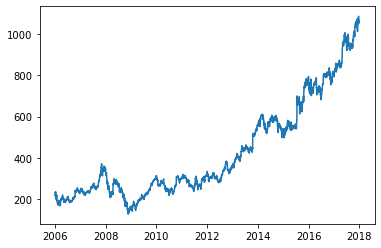

In [59]:
pyplot.plot(data.Date, data.Close )

In [46]:
data.header = None
data.index_col = None
data.parse_dates = True
data.squeeze = True

In [60]:
data['a'] = data.Date.apply(lambda x: 'y' if str(x)[:4] == '2017' else 'n')

In [61]:
data

,Date,Close,a
0,2006-01-03,217.83,n
1,2006-01-04,222.84,n
2,2006-01-05,225.85,n
3,2006-01-06,233.06,n
4,2006-01-09,233.68,n
...,...,...,...
3014,2017-12-22,1068.86,y
3015,2017-12-26,1065.85,y
3016,2017-12-27,1060.20,y
3017,2017-12-28,1055.95,y


In [65]:
train

,Date,Close,a
0,2006-01-03,217.83,n
1,2006-01-04,222.84,n
2,2006-01-05,225.85,n
3,2006-01-06,233.06,n
4,2006-01-09,233.68,n
...,...,...,...
2763,2016-12-23,807.80,n
2764,2016-12-27,809.93,n
2765,2016-12-28,804.57,n
2766,2016-12-29,802.88,n


In [88]:
train = data[data.a=='n']
test = data[data.a=='y']
train = train.drop('a', axis = 1)
test = test.drop('a', axis = 1)

In [89]:
train.head()

,Date,Close
0,2006-01-03,217.83
1,2006-01-04,222.84
2,2006-01-05,225.85
3,2006-01-06,233.06
4,2006-01-09,233.68


In [90]:
test.head()

,Date,Close
2768,2017-01-03,808.01
2769,2017-01-04,807.77
2770,2017-01-05,813.02
2771,2017-01-06,825.21
2772,2017-01-09,827.18


In [91]:
# fit model
model = ARIMA(train.Close, order=(5,1,0))

In [92]:
model_fit = model.fit()

In [93]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2768
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -9171.935
Date:                Sun, 07 Nov 2021   AIC                          18355.871
Time:                        22:46:32   BIC                          18391.424
Sample:                             0   HQIC                         18368.712
                               - 2768                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0237      0.014      1.684      0.092      -0.004       0.051
ar.L2          0.0066      0.015      0.428      0.669      -0.024       0.037
ar.L3         -0.0467      0.013     -3.478      0.0

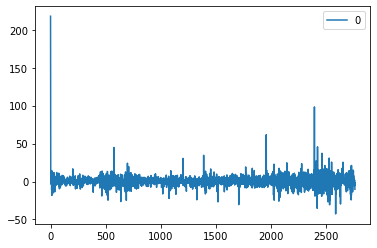

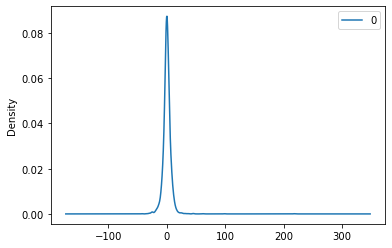

                 0
count  2768.000000
mean      0.294210
std       7.835231
min     -42.727425
25%      -2.648161
50%       0.125455
75%       3.208466
max     217.830000


In [94]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [95]:
train

,Date,Close
0,2006-01-03,217.83
1,2006-01-04,222.84
2,2006-01-05,225.85
3,2006-01-06,233.06
4,2006-01-09,233.68
...,...,...
2763,2016-12-23,807.80
2764,2016-12-27,809.93
2765,2016-12-28,804.57
2766,2016-12-29,802.88


# 1. First model

Use ARIMA model

[217.83 222.84 225.85 ... 804.57 802.88 792.45]
predicted=792.409611, expected=808.010000
predicted=808.458615, expected=807.770000
predicted=808.404122, expected=813.020000
predicted=812.579277, expected=825.210000
predicted=825.280327, expected=827.180000
predicted=827.019682, expected=826.010000
predicted=825.338657, expected=829.860000
predicted=829.610449, expected=829.530000
predicted=829.523708, expected=830.940000
predicted=830.808108, expected=827.460000
predicted=827.340223, expected=829.020000
predicted=828.958728, expected=824.370000
predicted=824.411271, expected=828.170000
predicted=828.207596, expected=844.430000
predicted=845.026798, expected=849.530000
predicted=849.665156, expected=858.450000
predicted=857.905450, expected=856.980000
predicted=856.464927, expected=845.030000
predicted=844.156836, expected=823.830000
predicted=823.048373, expected=820.190000
predicted=820.480324, expected=815.240000
predicted=816.339379, expected=818.260000
predicted=818.999742, expect

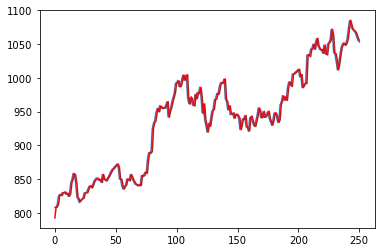

In [96]:
train, test = train.Close.values, test.Close.values
history = [x for x in train]
predictions = list()
print(train)
# walk-forward validation
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

It fits well and its RMSE is 9.218

# 2. Second model

Use ARMA model.

In [102]:
from statsmodels.tsa.arima_model import ARMA

[217.83 222.84 225.85 ... 804.57 802.88 792.45]
predicted=792.071265, expected=808.010000
predicted=808.254936, expected=807.770000
predicted=807.647423, expected=813.020000
predicted=813.025675, expected=825.210000
predicted=825.386777, expected=827.180000
predicted=827.113673, expected=826.010000
predicted=825.849928, expected=829.860000
predicted=829.839344, expected=829.530000
predicted=829.409297, expected=830.940000
predicted=830.862949, expected=827.460000
predicted=827.263152, expected=829.020000
predicted=828.946487, expected=824.370000
predicted=824.146545, expected=828.170000
predicted=828.146477, expected=844.430000
predicted=844.813277, expected=849.530000
predicted=849.548269, expected=858.450000
predicted=858.566674, expected=856.980000
predicted=856.836001, expected=845.030000
predicted=844.620468, expected=823.830000
predicted=823.140835, expected=820.190000
predicted=819.973471, expected=815.240000
predicted=814.988183, expected=818.260000
predicted=818.227944, expect

/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=821.544484, expected=829.230000
predicted=829.328613, expected=829.880000
predicted=829.787287, expected=830.060000
predicted=829.770953, expected=834.850000
predicted=834.982186, expected=838.960000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=839.074046, expected=840.030000
predicted=839.950854, expected=837.320000
predicted=837.132899, expected=842.170000
predicted=842.196319, expected=846.550000
predicted=846.563398, expected=849.270000
predicted=849.236436, expected=851.360000
predicted=851.311364, expected=851.000000
predicted=850.882353, expected=847.810000
predicted=847.611635, expected=849.670000
predicted=849.615711, expected=844.930000
predicted=844.690423, expected=856.750000
predicted=856.970567, expected=849.850000
predicted=849.555770, expected=849.080000
predicted=848.951971, expected=847.270000
predicted=847.110713, expected=851.150000
predicted=851.147376, expected=853.640000
predicted=853.603464, expected=857.840000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=857.952649, expected=861.400000
predicted=861.389196, expected=864.580000
predicted=864.566095, expected=865.910000
predicted=865.840250, expected=868.390000
predicted=868.353360, expected=870.000000
predicted=869.944628, expected=872.370000
predicted=872.330329, expected=867.910000
predicted=867.684093, expected=850.140000
predicted=849.538415, expected=849.800000
predicted=849.684829, expected=839.650000
predicted=839.257679, expected=835.140000
predicted=834.902995, expected=838.510000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=838.602718, expected=840.630000
predicted=840.581267, expected=849.870000
predicted=850.024776, expected=849.480000
predicted=849.363205, expected=847.800000
predicted=847.627320, expected=856.750000
predicted=856.896882, expected=852.570000
predicted=852.348271, expected=848.910000
predicted=848.700852, expected=845.100000
predicted=844.885763, expected=842.100000
predicted=841.909770, expected=841.700000
predicted=841.580742, expected=839.880000
predicted=839.720827, expected=841.460000
predicted=841.392321, expected=840.180000
predicted=840.034133, expected=855.130000
predicted=855.441589, expected=853.990000
predicted=853.853885, expected=856.510000
predicted=856.475193, expected=860.080000
predicted=860.075009, expected=858.950000
predicted=858.815480, expected=878.930000
predicted=879.381156, expected=888.840000
predicted=889.029253, expected=889.140000
predicted=889.051566, expected=891.440000
predicted=891.408204, expected=924.520000
predicted=925.407915, expected=932

/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=956.646814, expected=954.840000
predicted=954.690784, expected=955.890000
predicted=955.833657, expected=955.140000
predicted=955.029070, expected=959.220000
predicted=959.260787, expected=964.610000
predicted=964.780257, expected=942.170000
predicted=941.375861, expected=950.500000
predicted=950.654468, expected=954.650000
predicted=954.682810, expected=964.070000
predicted=964.268158, expected=970.550000
predicted=970.666408, expected=977.610000
predicted=977.828037, expected=991.860000
predicted=992.228527, expected=993.270000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=993.314780, expected=996.170000
predicted=996.179947, expected=987.090000
predicted=986.803326, expected=988.290000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=988.244859, expected=996.120000
predicted=996.289057, expected=1003.880000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1004.128237, expected=996.680000
predicted=996.452744, expected=1001.590000
predicted=1001.662875, expected=1004.280000
predicted=1004.282442, expected=970.120000
predicted=968.979888, expected=961.810000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=961.539480, expected=970.500000
predicted=970.778944, expected=967.930000
predicted=967.761861, expected=960.180000
predicted=959.841377, expected=958.620000
predicted=958.569987, expected=975.220000
predicted=975.662120, expected=968.990000
predicted=968.708374, expected=978.590000
predicted=978.798686, expected=976.620000
predicted=976.472228, expected=986.090000
predicted=986.297285, expected=972.090000
predicted=971.589973, expected=948.090000
predicted=947.234336, expected=961.010000
predicted=961.300310, expected=937.820000
predicted=937.101265, expected=929.680000
predicted=929.353865, expected=919.460000
predicted=919.067880, expected=932.260000
predicted=932.522553, expected=927.690000
predicted=927.469054, expected=940.810000
predicted=941.070277, expected=951.000000
predicted=951.192264, expected=953.530000
predicted=953.512787, expected=967.660000
predicted=967.965134, expected=968.850000
predicted=968.883746, expected=976.910000
predicted=977.053598, expected=975

/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=975.845240, expected=986.950000
predicted=987.178530, expected=992.770000
predicted=992.937554, expected=992.190000
predicted=992.090532, expected=993.840000
predicted=993.803112, expected=998.310000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=998.437319, expected=969.030000
predicted=968.216759, expected=965.310000
predicted=965.112100, expected=952.510000
predicted=952.047088, expected=958.330000
predicted=958.404507, expected=945.500000
predicted=945.049303, expected=946.560000
predicted=946.497487, expected=947.640000
predicted=947.578130, expected=940.300000
predicted=940.003751, expected=945.790000
predicted=945.845905, expected=945.750000
predicted=945.654651, expected=944.190000
predicted=944.055193, expected=940.080000
predicted=939.875383, expected=923.590000
predicted=923.036188, expected=930.090000
predicted=930.171330, expected=938.930000
predicted=939.170463, expected=938.080000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=937.961004, expected=944.270000
predicted=944.346550, expected=927.660000
predicted=927.123553, expected=926.180000
predicted=927.515280, expected=920.870000
predicted=920.632026, expected=940.400000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=940.813539, expected=942.580000
predicted=942.547027, expected=936.890000
predicted=936.648848, expected=930.500000
predicted=930.238298, expected=928.130000
predicted=928.067734, expected=935.750000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=935.857262, expected=943.630000
predicted=943.750958, expected=955.240000
predicted=955.465282, expected=951.990000
predicted=951.811359, expected=941.480000
predicted=941.098406, expected=942.020000
predicted=941.941702, expected=949.890000
predicted=950.013874, expected=941.410000
predicted=941.093198, expected=943.290000
predicted=943.248066, expected=946.650000
predicted=946.648649, expected=950.440000
predicted=950.449339, expected=940.130000
predicted=939.858267, expected=935.290000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=935.064872, expected=929.750000
predicted=929.505362, expected=936.860000
predicted=936.957264, expected=947.540000
predicted=947.738240, expected=947.550000
predicted=947.461796, expected=943.260000
predicted=943.051175, expected=934.280000
predicted=934.039214, expected=937.430000
predicted=937.424342, expected=959.900000
predicted=960.436456, expected=964.810000
predicted=964.858580, expected=973.720000
predicted=973.887946, expected=967.470000
predicted=967.202316, expected=972.080000
predicted=972.123581, expected=966.780000
predicted=966.542471, expected=985.190000
predicted=985.606635, expected=993.640000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=985.098644, expected=992.310000
predicted=992.184361, expected=987.800000
predicted=987.589649, expected=1005.650000
predicted=1006.060350, expected=1005.650000
predicted=1005.565412, expected=1007.870000
predicted=1007.851871, expected=1009.350000
predicted=1009.308528, expected=1011.000000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=1011.045483, expected=1012.740000
predicted=1012.705982, expected=1001.840000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1001.540869, expected=1005.070000
predicted=1005.073909, expected=985.540000
predicted=984.928323, expected=988.490000
predicted=988.482351, expected=991.460000
predicted=991.454638, expected=991.420000
predicted=991.333060, expected=1033.670000
predicted=1034.778378, expected=1033.130000
predicted=1033.116038, expected=1033.040000
predicted=1032.954969, expected=1042.600000
predicted=1042.768625, expected=1042.970000
predicted=1042.899330, expected=1049.990000
predicted=1050.171119, expected=1042.680000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=1042.410847, expected=1052.390000
predicted=1052.554605, expected=1058.290000
predicted=1058.361747, expected=1047.720000
predicted=1047.457324, expected=1044.150000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=1044.060544, expected=1041.200000
predicted=1041.043746, expected=1041.640000
predicted=1041.569303, expected=1036.410000
predicted=1036.197601, expected=1048.470000
predicted=1048.690885, expected=1035.890000
predicted=1035.507631, expected=1034.660000
predicted=1034.551050, expected=1050.300000
predicted=1050.592242, expected=1051.920000
predicted=1051.878511, expected=1056.520000
predicted=1056.628073, expected=1072.010000
predicted=1072.310419, expected=1063.290000
predicted=1063.007038, expected=1037.380000
predicted=1036.654305, expected=1036.170000
predicted=1036.058679, expected=1025.070000
predicted=1024.706576, expected=1011.870000
predicted=1011.440856, expected=1019.600000
predicted=1019.712735, expected=1032.720000
predicted=1032.983024, expected=1044.570000
predicted=1044.812660, expected=1049.380000
predicted=1049.434133, expected=1051.970000
predicted=1051.961303, expected=1048.770000
predicted=1048.682260, expected=1051.390000
predicted=1051.382015, expected=

/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1057.562791, expected=1072.000000
predicted=1072.401479, expected=1085.090000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=1085.474094, expected=1079.780000
predicted=1079.551960, expected=1073.560000
predicted=1073.379965, expected=1070.850000
predicted=1070.771718, expected=1068.860000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


predicted=1068.802120, expected=1065.850000
predicted=1065.689457, expected=1060.200000
predicted=1059.954372, expected=1055.950000
predicted=1055.744448, expected=1053.400000
Test RMSE: 9.220


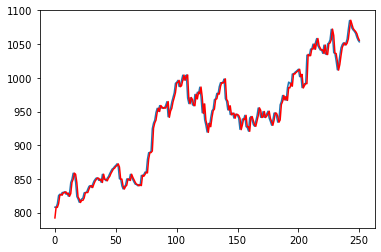

In [110]:
history = [x for x in train]
predictions = list()
print(train)
# walk-forward validation
for t in range(len(test)):
    model = ARMA(history, order=(2, 0, 2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

It fits well and its RMSE is 9.220, its RMSE is great than ARIMA model.

# 3.Third model

Use Markov model.

In [121]:
from statsmodels.tsa.regime_switching.markov_regression import MarkovRegression

[217.83 222.84 225.85 ... 804.57 802.88 792.45]
predicted=274.201170, expected=808.010000
predicted=274.199771, expected=807.770000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


predicted=267.774972, expected=813.020000
predicted=274.122573, expected=825.210000
predicted=274.204309, expected=827.180000
predicted=274.197101, expected=826.010000


/opt/anaconda3/envs/ml/lib/python3.8/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


predicted=274.182259, expected=829.860000
predicted=274.193085, expected=829.530000
predicted=274.199045, expected=830.940000
predicted=274.198614, expected=827.460000
predicted=274.137539, expected=829.020000
predicted=274.208483, expected=824.370000
predicted=274.207929, expected=828.170000
predicted=274.169874, expected=844.430000
predicted=274.184684, expected=849.530000
predicted=274.184623, expected=858.450000
predicted=274.216230, expected=856.980000
predicted=274.284074, expected=845.030000
predicted=274.245622, expected=823.830000
predicted=274.203477, expected=820.190000
predicted=274.218662, expected=815.240000
predicted=274.173077, expected=818.260000
predicted=274.209998, expected=820.130000
predicted=274.209262, expected=821.620000
predicted=274.216935, expected=829.230000
predicted=274.239994, expected=829.880000
predicted=274.212323, expected=830.060000
predicted=274.291327, expected=834.850000
predicted=274.217158, expected=838.960000
predicted=274.212395, expected=840

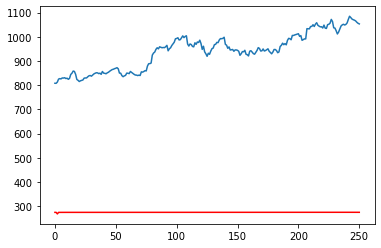

In [125]:
history = [x for x in train]
predictions = list()
print(train)
# walk-forward validation
for t in range(len(test)):
    model = MarkovRegression(history, k_regimes=2)
    model_fit = model.fit()
    output = model_fit.predict()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

A bad model to fit in this case. The ARIMA model is best in this case because its RMSE is lowest.